In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("data/raw/WAR_class_dev.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6782 entries, 0 to 6781
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   poss          6782 non-null   float64
 1   mp            6782 non-null   float64
 2   raptor_total  6782 non-null   float64
 3   pace_impact   6782 non-null   float64
 4   war_class     6782 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 265.1 KB


In [7]:
df.head(60)

,poss,mp,raptor_total,pace_impact,war_class
0,2283.468774,826.890427,-3.369325,0.472195,2
1,1185.081598,567.265296,-5.389056,1.567405,2
2,5272.362761,2403.044668,7.084319,-0.534305,3
3,7594.083790,3709.114977,5.532538,-0.710111,3
4,8479.653469,3803.026613,5.089253,-0.699135,3
5,6783.313142,3068.998628,4.953955,-0.607349,3
6,6937.503004,3284.773472,3.467463,-0.431859,3
7,6655.777290,3333.022120,2.755609,-0.380965,3
8,7016.911712,3355.531715,4.271910,-0.380062,3
9,6558.393051,3024.550550,4.851383,-0.187223,3


In [8]:
# --- 2) Duplicados ---
dups = df.duplicated().sum()
print(f"\nFilas duplicadas (todas las columnas iguales): {dups}")


Filas duplicadas (todas las columnas iguales): 0



Distribución de war_class (conteos y %):


,count,pct
war_class,,
1,2029,29.92
2,2509,36.99
3,2244,33.09


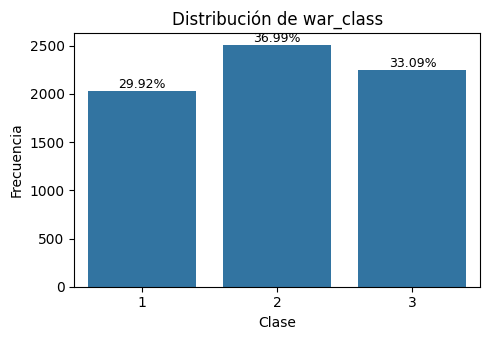

In [9]:
# --- 3) Distribución de la variable objetivo (balance de clases) ---
if "war_class" not in df.columns:
    raise ValueError("No se encontró la columna 'war_class' en el dataset.")

cls_counts = df["war_class"].value_counts(dropna=False).sort_index()
cls_pct = (cls_counts/cls_counts.sum()*100).round(2)
print("\nDistribución de war_class (conteos y %):")
display(pd.DataFrame({"count": cls_counts, "pct": cls_pct}))

plt.figure(figsize=(5,3.5))
sns.barplot(x=cls_counts.index.astype(str), y=cls_counts.values)
plt.title("Distribución de war_class")
plt.xlabel("Clase"); plt.ylabel("Frecuencia")
for i,(x,y) in enumerate(zip(cls_counts.index, cls_counts.values)):
    plt.text(i, y, f"{cls_pct.loc[x]}%", ha="center", va="bottom", fontsize=9)
plt.tight_layout(); plt.show()

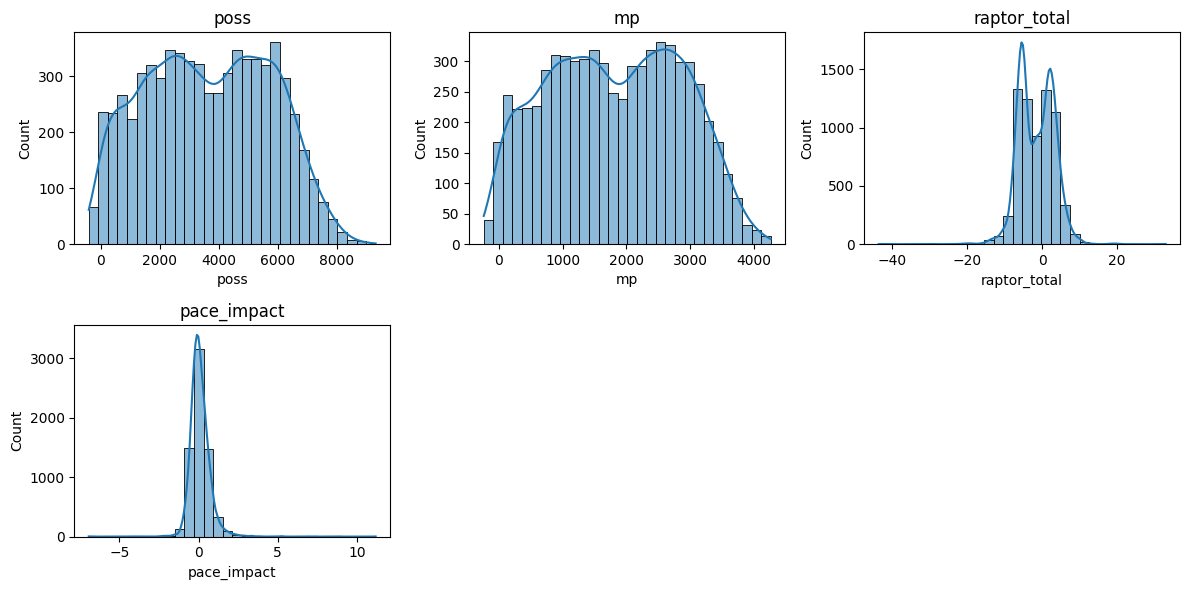

In [10]:
# --- 4) Variables numéricas: hist/kde ---
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# si war_class es numérica (1/2/3), la quitamos de la lista de features para los hist
num_feats = [c for c in num_cols if c != "war_class"]

if num_feats:
    n = len(num_feats)
    ncols = 3
    nrows = int(np.ceil(n / ncols))
    plt.figure(figsize=(ncols*4, nrows*3))
    for i, c in enumerate(num_feats, 1):
        ax = plt.subplot(nrows, ncols, i)
        sns.histplot(df[c], kde=True, bins=30, ax=ax)
        ax.set_title(c)
    plt.tight_layout(); plt.show()

cambiar (preguntar a chat cual va en cual)
raptor_total presenta algunos extremos (±20–25).

pace_impact tiene pocos puntos fuera del rango típico (±4–6).

poss/mp muestran colas hacia valores muy altos (jugadores con gran carga de minutos/posesiones).

In [11]:
# --- 5) Estadísticos por clase (media ± desvío) para numéricas ---
if num_feats:
    grp = df.groupby("war_class")[num_feats]
    desc = grp.agg(["mean", "std", "median"]).round(3)
    print("\nResumen por clase (mean/std/median):")
    display(desc)


Resumen por clase (mean/std/median):


poss                            mp                     \
               mean       std    median      mean      std    median   
war_class                                                              
1          2914.695  1209.213  2766.572  1453.322  598.039  1393.350   
2          2274.825  1781.002  1970.977  1127.047  875.402   996.490   
3          5821.468  1055.440  5856.731  2900.847  506.788  2909.272   

          raptor_total               pace_impact                
                  mean    std median        mean    std median  
war_class                                                       
1               -6.079  1.606 -5.755       0.148  0.452  0.132  
2               -2.165  3.783 -1.739       0.235  0.820  0.149  
3                3.432  1.936  3.081      -0.120  0.521 -0.187

4) Outliers (visuales)

raptor_total presenta algunos extremos (±20–25).

pace_impact tiene pocos puntos fuera del rango típico (±4–6).

poss/mp muestran colas hacia valores muy altos (jugadores con gran carga de minutos/posesiones).

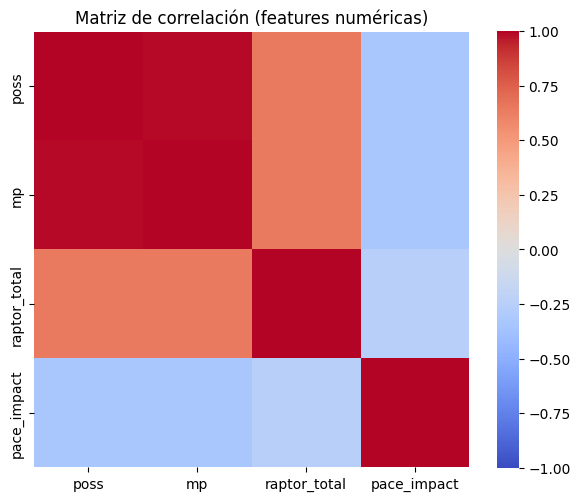

In [12]:
# --- 6) Correlaciones entre numéricas (Pearson) ---
if num_feats:
    corr = df[num_feats].corr(method="pearson")
    plt.figure(figsize=(6,5))
    sns.heatmap(corr, vmin=-1, vmax=1, cmap="coolwarm", annot=False, square=True)
    plt.title("Matriz de correlación (features numéricas)")
    plt.tight_layout(); plt.show()

5) Correlaciones entre atributos (numéricos)

poss–mp: correlación muy alta (≈ 0.95–0.98 visualmente) → fuerte multicolinealidad.

raptor_total correlaciona positivamente con poss y mp (moderado).

pace_impact muestra correlaciones débiles con el resto.

In [13]:
# (opcional) Correlación de cada numérica con la clase codificada (1/2/3)
# Útil si querés un ranking simple de relación lineal con la clase
if "war_class" in df and num_feats:
    tmp = df[["war_class"] + num_feats].dropna()
    targ_corr = tmp[num_feats].corrwith(tmp["war_class"]).sort_values(key=np.abs, ascending=False)
    print("\nCorrelación (Pearson) con war_class (1/2/3):")
    display(targ_corr.to_frame("corr").round(3))


Correlación (Pearson) con war_class (1/2/3):


,corr
raptor_total,0.811
mp,0.567
poss,0.564
pace_impact,-0.168


6) Correlación con la clase (Pearson con war_class)

raptor_total ≈ 0.81 → principal predictor: a mayor RAPTOR, mayor clase (de 1→3).

mp ≈ 0.57 y poss ≈ 0.56 → informativos, pero redundantes entre sí.

pace_impact ≈ −0.17 → señal débil; posible baja importancia.

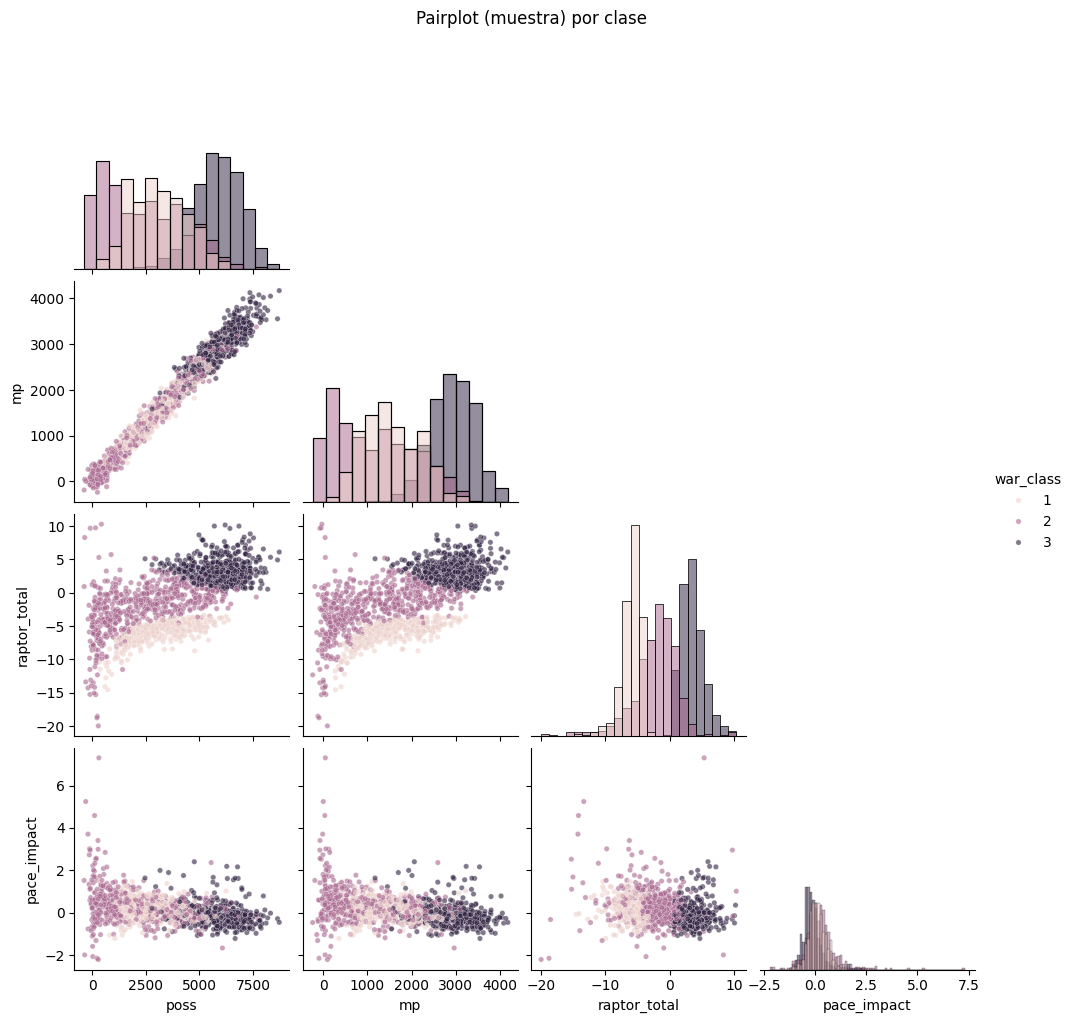

In [14]:
# --- 7) Pairplot muestrado con color por clase (para no matar el render) ---
sample_n = min(1500, len(df))
cols_for_pair = [c for c in num_feats][:4]  # elige hasta 4 para que sea legible
if len(cols_for_pair) >= 2:
    plot_df = df[cols_for_pair + ["war_class"]].dropna().sample(sample_n, random_state=42)
    sns.pairplot(plot_df, hue="war_class", corner=True, diag_kind="hist", plot_kws=dict(s=15, alpha=0.6))
    plt.suptitle("Pairplot (muestra) por clase", y=1.02)
    plt.show()

7) Relaciones bivariadas (pairplot)

Separación de clases principalmente a lo largo de raptor_total y (en menor medida) por mp/poss.

Superposición considerable entre clases 1 y 2 para valores bajos de raptor_total.